#  Contour plots in matplotlib


Brief:  Demonstration of how to plot line and filled contours using pyplot.

Author: Stephen Menary (sbmenary@gmail.com)

In [1]:
#  Required imports

import matplotlib.pyplot  as plt
from   matplotlib.lines   import Line2D
from   matplotlib.patches import Patch
import numpy as np

In [2]:
#  First we create values for the x- and y-axis values

grid_x_axis = np.array([100, 250, 300, 350, 400, 450, 500, 600])
grid_y_axis = np.array([2, 4, 6, 8, 10, 12])

print(f"X-axis with shape {grid_x_axis.shape}")
print(f"Y-axis with shape {grid_y_axis.shape}")


#  Now we turn these into meshgrids using the np.meshgrid function
#  -  meshgrid_x will be a 2D-object which respresents the x-coordinate of every point
#  -  meshgrid_y will be a 2D-object which respresents the y-coordinate of every point
#  -  note that the shape of meshgrid is [y, x]

meshgrid_x, meshgrid_y = np.meshgrid(grid_x_axis, grid_y_axis)

print(f"X-mesh with shape {meshgrid_x.shape}")
print(f"Y-mesh with shape {meshgrid_y.shape}")

X-axis with shape (8,)
Y-axis with shape (6,)
X-mesh with shape (6, 8)
Y-mesh with shape (6, 8)


In [3]:
#  Create function for printing z-values

def print_z (z) :
    shape = z.shape
    for i in range(shape[0]-1, -1, -1) :
        str_row = ""
        for j in range(shape[1]) :
            str_row = str_row + f"    {z[i,j]:.2f}"
        print(str_row)

#  Create some fake z-values

meshgrid_z = np.zeros(shape=meshgrid_x.shape)
for i, x in enumerate(grid_x_axis) :
    for j, y in enumerate(grid_y_axis) :
        meshgrid_z [j, i] = np.power((x-100.)/500., 2.) * (y-2.)/10.

#  Print z-values

print("Z-values are:")
print_z(meshgrid_z) 

Z-values are:
    0.00    0.09    0.16    0.25    0.36    0.49    0.64    1.00
    0.00    0.07    0.13    0.20    0.29    0.39    0.51    0.80
    0.00    0.05    0.10    0.15    0.22    0.29    0.38    0.60
    0.00    0.04    0.06    0.10    0.14    0.20    0.26    0.40
    0.00    0.02    0.03    0.05    0.07    0.10    0.13    0.20
    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00


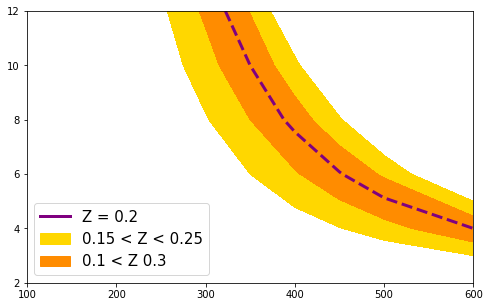

In [4]:
#  Make quick contour plot

fig = plt.figure(figsize=(8,5))
ax  = fig.add_subplot(1, 1, 1)

#  Make filled areas between z contours of 0.1, 0.15, 0.25 and 0.3
plt.contourf(meshgrid_x, meshgrid_y, meshgrid_z, [0.1, 0.15, 0.25, 0.3], linestyles=None, colors=["gold", "darkorange", "gold"])

#  Make z contour line at 0.2
plt.contour (meshgrid_x, meshgrid_y, meshgrid_z, [0.2], linestyles="dashed", colors=["purple"], linewidths=3)

#  Make legend by hand
plt.legend([Line2D([0], [0], color="purple"    , lw=3),
            Patch (          color="gold"      , linestyle=None), 
            Patch (          color="darkorange", linestyle=None)],
           ["Z = 0.2", "0.15 < Z < 0.25", "0.1 < Z 0.3"],
           loc="lower left",
           fontsize=15)

plt.show()